In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
df=pd.read_csv(r'cereal.csv')

In [41]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


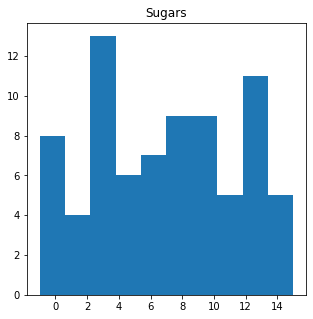

In [42]:
plt.figure(figsize=(5,5))
plt.hist(df['sugars'])
plt.title('Sugars')
plt.show()

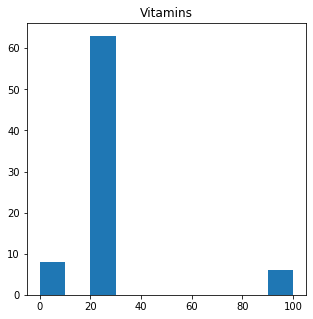

In [43]:
plt.figure(figsize=(5,5))
plt.hist(df['vitamins'])
plt.title('Vitamins')
plt.show()

In [44]:
al = {'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina',
      'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'}
df['mfr_name'] = df['mfr'].map(al)

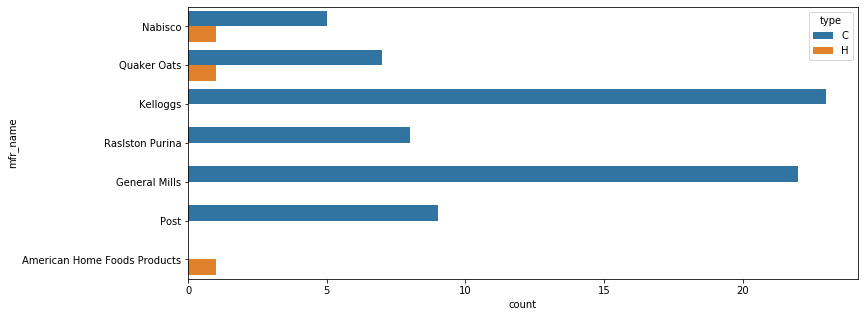

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['mfr_name'],data=df,hue='type')
plt.show()

In [46]:
df = df.iloc[:,3:-1]

In [47]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [48]:
x=df.iloc[:,0:12]
y=df[['rating']]

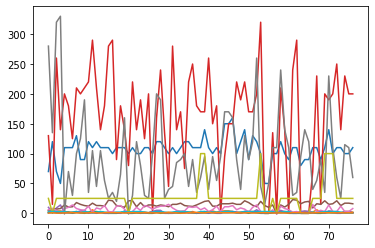

In [49]:
plt.plot(x)
plt.show()

In [50]:
sc = StandardScaler()
sc.fit(x) 
x = sc.transform(x)

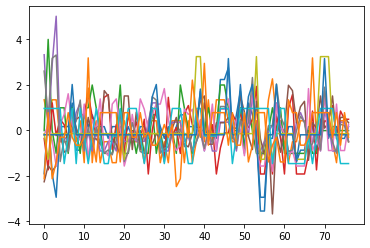

In [51]:
plt.plot(x)
plt.show()

In [52]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [53]:
lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pr= lr.predict(x_te)

In [54]:
mean_squared_error(y_te,y_pr)

1.401388811925632e-13

In [55]:
lr.coef_

array([[-4.31131291e+00,  3.56009207e+00, -1.69126539e+00,
        -4.53848744e+00,  8.15359895e+00,  4.64409638e+00,
        -3.20108487e+00, -2.40749071e+00, -1.13675038e+00,
        -6.09876425e-08, -2.55220425e-08,  3.69860485e-08]])

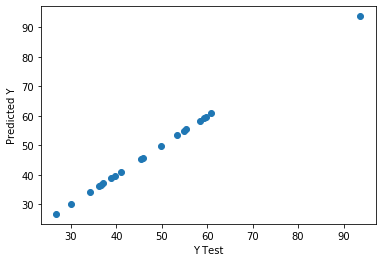

In [56]:
predictions = lr.predict(x_te)
plt.scatter(y_te,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()